<a href="https://colab.research.google.com/github/htharshht/OIBSIP/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name:** CAR PRICE PREDICTION WITH MACHINE LEARNING

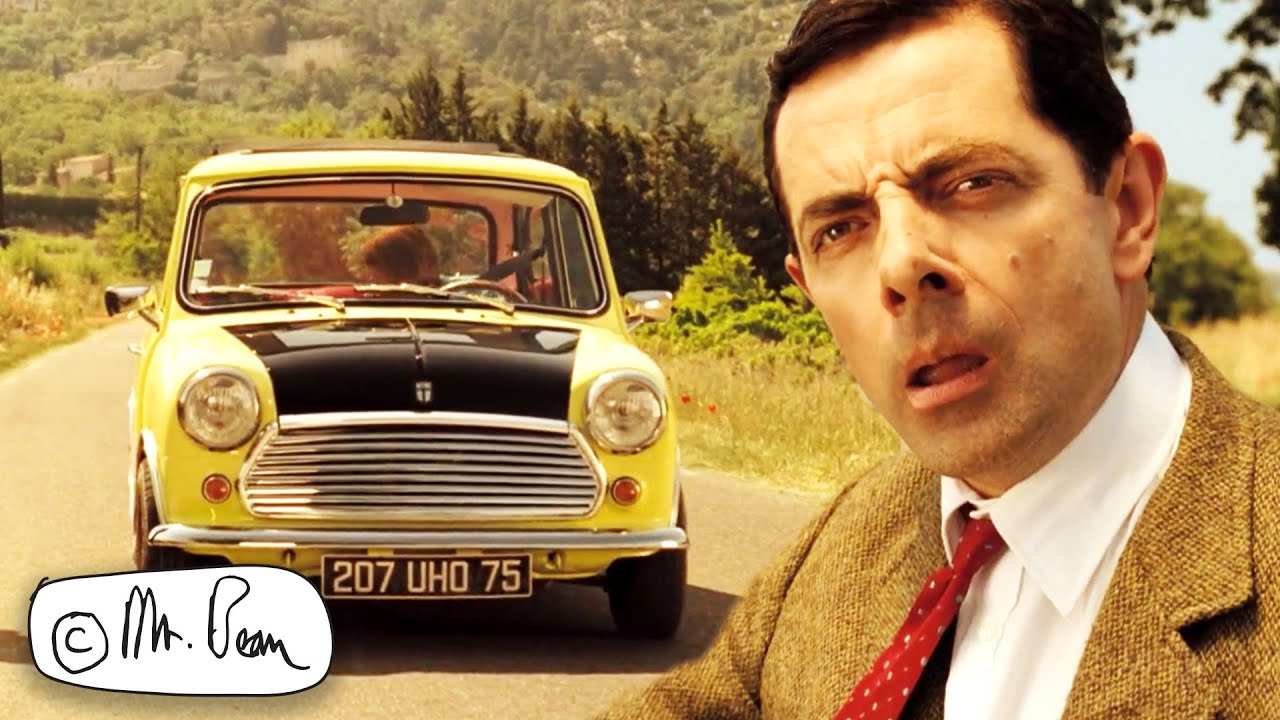

**Project Type:** Machine Learning

**Author:** Harshit Tiwari

Visit my **[GitHub](https://github.com/htharshht)**

**DataSet:** [CarPrice.csv](https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv)

# **Project Summary:**

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning.

In this project I am using a dataset which contains information of used cars. I will build an ML model to predict the price of the car.

In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import metrics
import warnings

In [ ]:
card = pd.read_csv('/content/drive/MyDrive/EDA Data Set/CarPriceCSV.txt')

In [ ]:
card.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
card.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
card.shape

(205, 26)

In [ ]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
card.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
pd.Series({col:card[col].unique() for col in card}) 

car_ID              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
symboling                                        [3, 1, 2, 0, -1, -2]
CarName             [alfa-romero giulia, alfa-romero stelvio, alfa...
fueltype                                                [gas, diesel]
aspiration                                               [std, turbo]
doornumber                                                [two, four]
carbody               [convertible, hatchback, sedan, wagon, hardtop]
drivewheel                                            [rwd, fwd, 4wd]
enginelocation                                          [front, rear]
wheelbase           [88.6, 94.5, 99.8, 99.4, 105.8, 99.5, 101.2, 1...
carlength           [168.8, 171.2, 176.6, 177.3, 192.7, 178.2, 176...
carwidth            [64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 67.9, 64....
carheight           [48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 52.0, 53....
curbweight          [2548, 2823, 2337, 2824, 2507, 2844, 2954, 308...
enginetype          

In [ ]:
print(card.fueltype.value_counts())
print(card.aspiration.value_counts())
print(card.drivewheel.value_counts())
print(card.enginelocation.value_counts())
print(card.fuelsystem.value_counts())
print(card.doornumber.value_counts())
print(card.carbody.value_counts())
print(card.enginetype.value_counts())
print(card.cylindernumber.value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


In [ ]:
# encoding "fueltype" Column
card.replace({'fueltype':{'gas':0, 'diesel':1}},inplace=True)

card.replace({'aspiration':{'std':0, 'turbo':1}}, inplace=True)

card.replace({'drivewheel':{'fwd':0, 'rwd':1, '4wd':2}}, inplace=True)

card.replace({'enginelocation':{'front':0, 'rear':1}}, inplace=True)

card.replace({'fuelsystem':{'mpfi':0,'2bbl':1,'idi':2,'1bbl':3,'spdi':4,'4bbl':5,'mfi':6,'spfi':7}},inplace=True)

card.replace({'doornumber':{'four':4,'two':2}},inplace=True)

card.replace({'carbody':{'sedan':0,'hatchback':1,'wagon':2,'hardtop':3,'convertible':4}}, inplace=True)

card.replace({'enginetype':{'ohc':0,'ohcf':1,'ohcv':2,'dohc':3,'l':4,'rotor':5,'dohcv':6}},inplace=True)

card.replace({'cylindernumber':{'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12}},inplace=True)

In [ ]:
card.corr(numeric_only=True)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.125568,0.067729,0.190352,0.075215,0.104650,0.051483,0.129729,0.170636,...,-0.033930,-0.232638,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.194311,-0.059866,-0.664073,0.301354,-0.111150,0.212471,-0.531954,-0.357612,...,-0.105790,0.155724,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
fueltype,0.125568,-0.194311,1.000000,0.401397,0.191491,-0.106275,0.051874,-0.040070,0.308346,0.212679,...,0.069594,0.254827,0.054451,0.241829,0.984356,-0.163926,-0.476883,0.255963,0.191392,0.105679
aspiration,0.067729,-0.059866,0.401397,1.000000,0.031792,-0.055455,0.153897,-0.057191,0.257611,0.234539,...,0.108217,0.266364,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,0.190352,-0.664073,0.191491,0.031792,1.000000,-0.340507,0.004549,-0.137757,0.447357,0.398568,...,0.020742,-0.165059,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
carbody,0.075215,0.301354,-0.106275,-0.055455,-0.340507,1.000000,0.178462,0.309907,-0.170051,-0.071322,...,0.104722,-0.054393,0.154351,-0.092747,-0.105144,0.129639,0.006010,-0.137525,-0.143814,0.107031
drivewheel,0.104650,-0.111150,0.051874,0.153897,0.004549,0.178462,1.000000,0.113823,0.366828,0.416076,...,0.409914,-0.207202,0.512709,-0.192827,0.018903,0.445806,-0.139905,-0.503655,-0.549492,0.490739
enginelocation,0.051483,0.212471,-0.040070,-0.057191,-0.137757,0.309907,0.113823,1.000000,-0.187790,-0.050989,...,0.196826,-0.092625,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,0.129729,-0.531954,0.308346,0.257611,0.447357,-0.170051,0.366828,-0.187790,1.000000,0.874587,...,0.569329,-0.229733,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.212679,0.234539,0.398568,-0.071322,0.416076,-0.050989,0.874587,1.000000,...,0.683360,-0.310001,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920


In [ ]:
card

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,2,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,2,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,2,1,1,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,4,0,0,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,4,0,2,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),0,0,4,0,1,0,109.1,...,141,0,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,0,1,4,0,1,0,109.1,...,141,0,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,0,0,4,0,1,0,109.1,...,173,0,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,1,1,4,0,1,0,109.1,...,145,2,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
pd.Series({col:card[col].unique() for col in card}) 

car_ID              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
symboling                                        [3, 1, 2, 0, -1, -2]
CarName             [alfa-romero giulia, alfa-romero stelvio, alfa...
fueltype                                                       [0, 1]
aspiration                                                     [0, 1]
doornumber                                                     [2, 4]
carbody                                               [4, 1, 0, 2, 3]
drivewheel                                                  [1, 0, 2]
enginelocation                                                 [0, 1]
wheelbase           [88.6, 94.5, 99.8, 99.4, 105.8, 99.5, 101.2, 1...
carlength           [168.8, 171.2, 176.6, 177.3, 192.7, 178.2, 176...
carwidth            [64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 67.9, 64....
carheight           [48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 52.0, 53....
curbweight          [2548, 2823, 2337, 2824, 2507, 2844, 2954, 308...
enginetype          

In [ ]:
X = card.drop(['CarName','price'],axis=1)
Y = card['price']

In [ ]:
print(X)

     car_ID  symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0         1          3         0           0           2        4           1   
1         2          3         0           0           2        4           1   
2         3          1         0           0           2        1           1   
3         4          2         0           0           4        0           0   
4         5          2         0           0           4        0           2   
..      ...        ...       ...         ...         ...      ...         ...   
200     201         -1         0           0           4        0           1   
201     202         -1         0           1           4        0           1   
202     203         -1         0           0           4        0           1   
203     204         -1         1           1           4        0           1   
204     205         -1         0           1           4        0           1   

     enginelocation  wheelb

In [ ]:
print(Y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


# Splitting the test and train data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

NameError: ignored

# Model Training

# 1. Linear Regression

In [ ]:
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
pred_train_data = lin_reg_model.predict(X_train)

In [ ]:
# r squre error
error_score = metrics.r2_score(Y_train, pred_train_data)
print('r2_error score is:', error_score)

r2_error score is: 0.8938952230766433


***Visualizing the actual prices and Predicted prices***

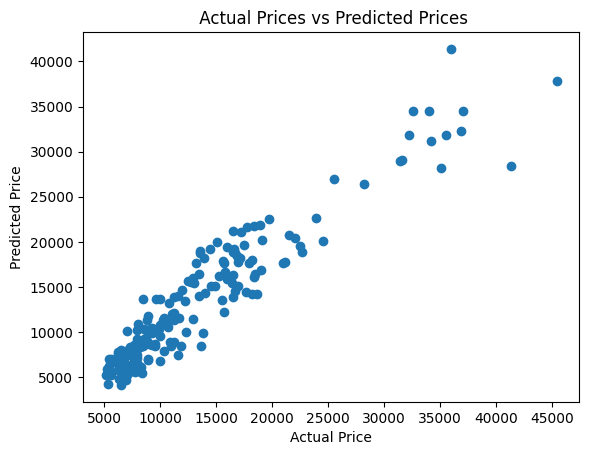

In [ ]:
plt.scatter(Y_train, pred_train_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
pred_test_data = lin_reg_model.predict(X_test)

In [ ]:
# r squre error
error_score_test = metrics.r2_score(Y_test, pred_test_data)
print('r2_error score is:', error_score_test)

r2_error score is: 0.9251928427964322


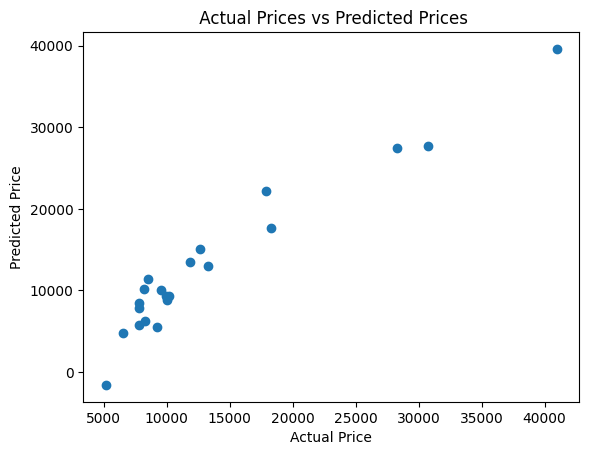

In [ ]:
plt.scatter(Y_test, pred_test_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# 2. Lasso Regression

In [ ]:
lasso_model = Lasso()

In [ ]:
lasso_model.fit(X_train,Y_train)

Lasso()

***Model evaluation***

In [ ]:
# prediction on Training data
train_pred = lasso_model.predict(X_train)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_train, train_pred)
print("R squared Error : ", error_score)

R squared Error :  0.8938712626608354


***Visualizing the actual prices and Predicted prices***

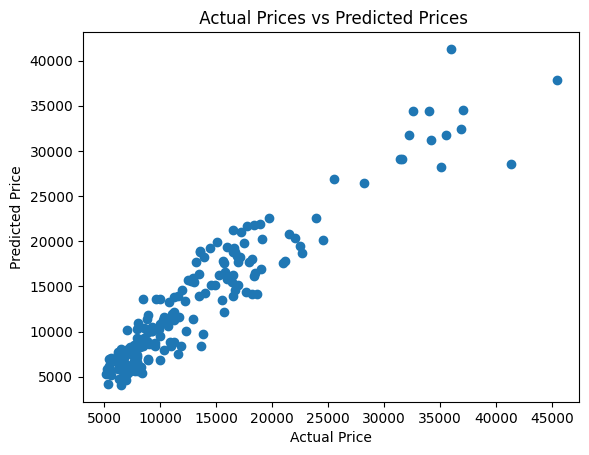

In [ ]:
plt.scatter(Y_train, train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Training data
test_pred = lasso_model.predict(X_test)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_pred)
print("R squared Error : ", error_score)

R squared Error :  0.9245889450193208


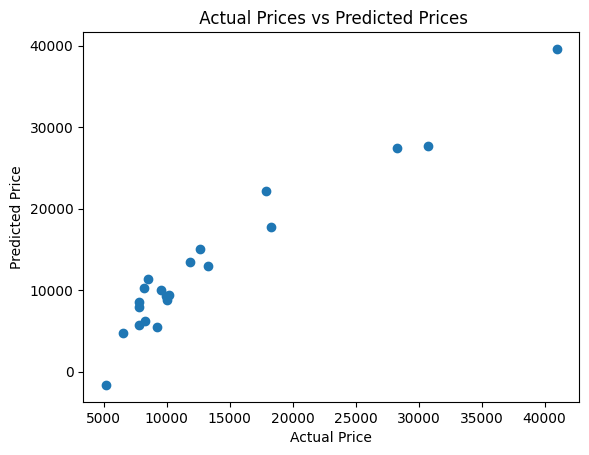

In [ ]:
plt.scatter(Y_test, test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()